# Encoding Model (GLMs) for population activity as a function of sensory and behavioral variables

In [1]:
# importing modules and packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from io_utils import *
from plotting_utils import *
from analysis_utils import * 
from pathlib import Path
import pickle
import scipy


In [2]:
animals = ['29L','3095','3096','3097','30B','30L','30R2','4013','4014','4015','4016','91R2'] # list of all aniamls
days = ['d1_balbc','d2_balbc','d3_balbc','d4_balbc','d5_balbc','d6_balbc','d7_balbc','d8_balbc','d9_mCD1'] # list of all days
daysObs = ['d1_obs','d2_obs','d3_obs','d4_obsc','d5_obs','d6_obs','d7_obs','d8_obs','d9_obs'] # list of all days for observer group
animalsObs = ['29L','30R2'] # list of observer animals
sessions = ['t1','t2','t3'] # session in each day

In [3]:
# with open('../data/29L_d1_balbc_t1_zscored_features.pickle', 'rb') as handle: # from cup folder 020924
#     dict = pickle.load(handle)
# df = pd.DataFrame(dict)
# df.head()
z = pd.read_parquet('../data/29L_d1_balbc_t1_zscored_features.parquet')
z.head()

,resident tti2head,resident tti2trunk,resident tti2neck,resident tti2centroid,resident head2nose,resident trunk2head,resident forepaw left2head,resident forepaw right2head,resident forepaw left2trunk,resident forepaw right2trunk,...,resident2intruder nose-centroid mean across lags,resident2intruder nose-centroid median across lags,resident2intruder nose-centroid sum across lags,intruder2resident nose-centroid mean across lags,intruder2resident nose-centroid median across lags,intruder2resident nose-centroid sum across lags,intruder2resident nose-tti mean across lags,intruder2resident nose-tti median across lags,intruder2resident nose-tti sum across lags,pixel change
0,-0.772152,-0.655448,-1.130393,-0.097189,1.360581,-1.378523,-0.989778,2.040595,0.167322,1.853846,...,0.256217,0.997051,0.256217,-0.384007,0.164879,-0.384007,-1.012908,-0.549364,-1.012908,1.888377
1,-0.766932,-0.649833,-1.124174,-0.093004,1.358083,-1.372003,-0.984754,2.041990,0.156222,1.844537,...,0.257808,1.002044,0.257808,-0.382684,0.168854,-0.382684,-1.011720,-0.545818,-1.011720,1.909116
2,-0.756546,-0.638667,-1.111799,-0.084690,1.353078,-1.359033,-0.974688,2.044690,0.134239,1.826001,...,0.260978,1.011921,0.260978,-0.380049,0.176720,-0.380049,-1.009355,-0.538797,-1.009355,1.923927
3,-0.741099,-0.622070,-1.093393,-0.072356,1.345553,-1.339750,-0.959545,2.048513,0.101796,1.798395,...,0.265694,1.026467,0.265694,-0.376129,0.188308,-0.376129,-1.005837,-0.528449,-1.005837,1.932045
4,-0.720747,-0.600227,-1.069145,-0.056167,1.335495,-1.314358,-0.939283,2.053199,0.059511,1.761960,...,0.271914,1.045369,0.271914,-0.370960,0.203375,-0.370960,-1.001197,-0.514983,-1.001197,1.932794


In [4]:
animal = '29L'
df = load_and_wrangle(mouseId=animal, path=None, overwrite=False) # load csv for animal

In [5]:
featuresShortlist = ["proximity","resident centroid roc 500 ms", "intruder centroid roc 500 ms",'resident2intruder head-head', 'resident2intruder head-tti','resident2intruder head2head angle', 'resident2intruder head2tti angle', "intruder2resident head2centroid angle"]
featuresLonglist = ["proximity",'resident2intruder head-head', 'resident2intruder head-tti','resident2intruder head2head angle', 'resident2intruder head2tti angle', "intruder2resident head2centroid angle","resident centroid roc 500 ms", "intruder centroid roc 500 ms",
   "resident tti2head", "intruder tti2head", "resident tailbase2head angle", "intruder tailbase2head angle"] # potentially add more

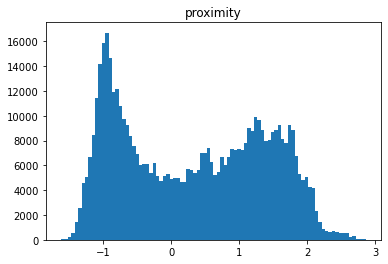

KeyboardInterrupt: 

In [6]:
histogram_feature(animal, features=featuresShortlist, path=None)

In [21]:
regions = get_regions_dataframe(df) # get recorded regions from dataframe
print(regions)

['PrL (E)', 'PrL (I)', 'vLS (E)', 'vLS (I)', 'POA (E)', 'POA (I)', 'AH (E)', 'AH (I)', 'MeA (E)', 'MeA (I)', 'VMH (E)', 'VMH (I)', 'PAG (E)', 'PMv (E)', 'PMv (I)', 'LHb (E)', 'LHb (I)', 'PA (E)', 'PA (I)', 'NAc (DA)']


In [8]:
X_all, X, bin_centers = get_design_X_GLM_features(animal, features=[featuresShortlist[0]], Nbins=10)

In [6]:
Y_all, Y = get_output_Y_GLM(animal, 'VMH (E)', path=None)


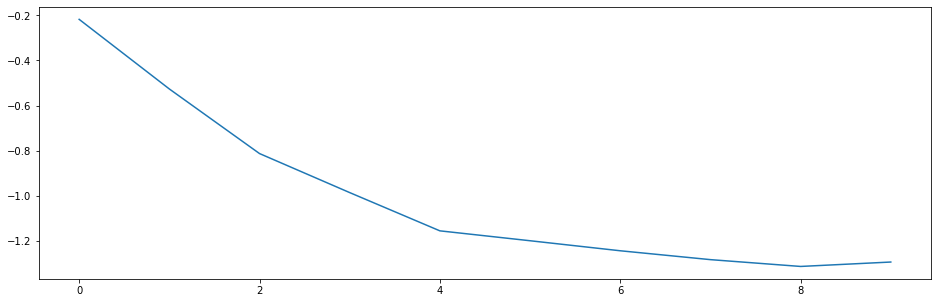

0.809310666726412


In [11]:
w_hat = solution_linear_Gaussian_smoothing(X_all, Y_all, feature_start=[0, 1, X_all.shape[1]], alpha=10) # bias + one tuning curve
plt.figure(figsize=(16,5))
plt.plot(w_hat[1:])
plt.show()

print(mse(X_all, Y_all, w_hat))

PrL (E)
proximity 0.62
resident centroid roc 500 ms 0.6
intruder centroid roc 500 ms 0.64


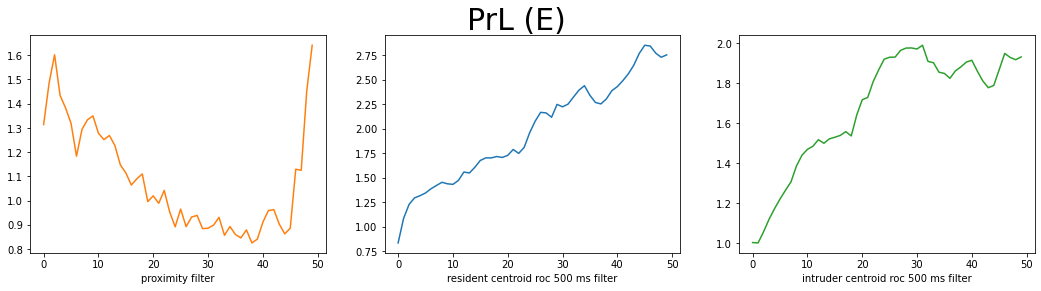

PrL (I)
proximity 0.43
resident centroid roc 500 ms 0.43
intruder centroid roc 500 ms 0.45


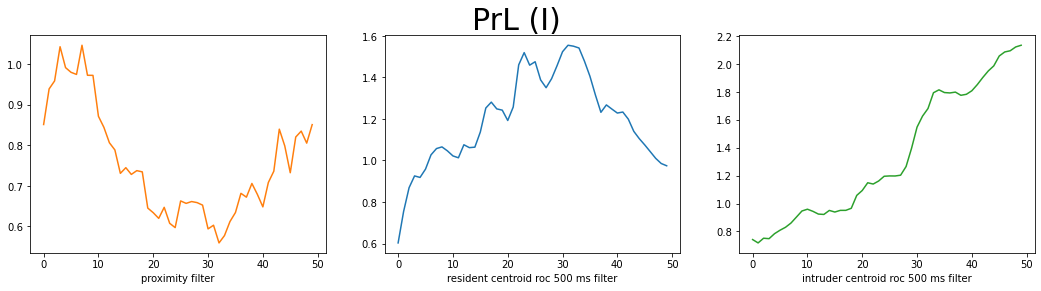

vLS (E)
proximity 0.16
resident centroid roc 500 ms 0.16
intruder centroid roc 500 ms 0.17


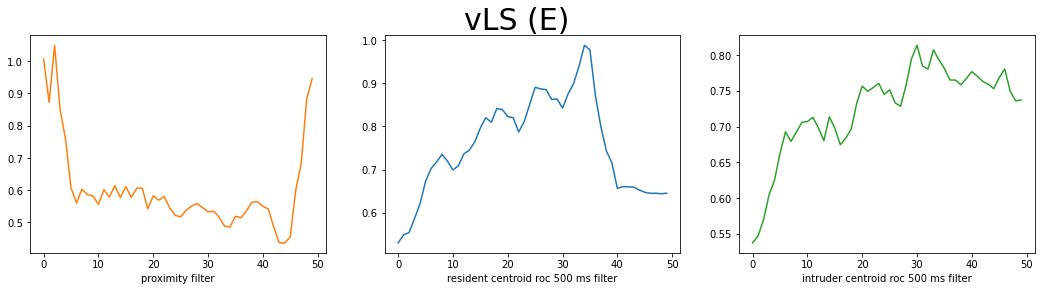

vLS (I)
proximity 0.33
resident centroid roc 500 ms 0.35
intruder centroid roc 500 ms 0.35


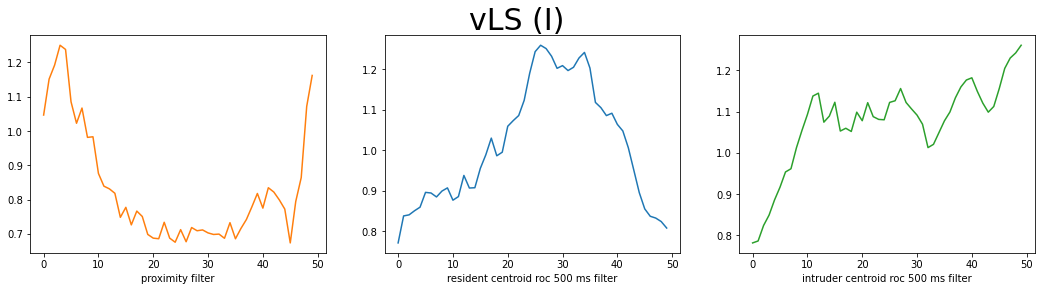

POA (E)
proximity 0.22
resident centroid roc 500 ms 0.25
intruder centroid roc 500 ms 0.25


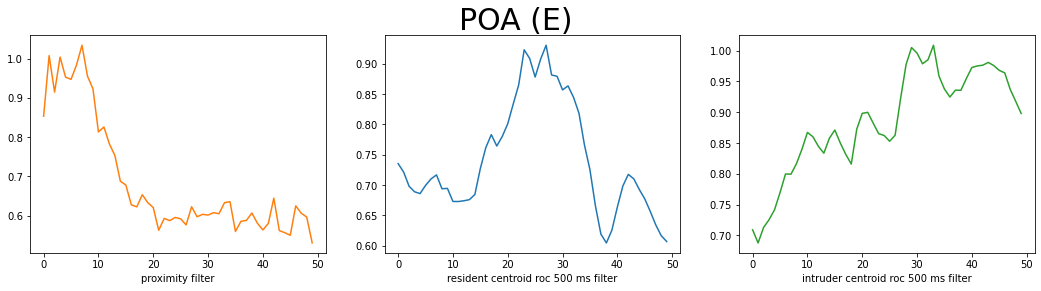

POA (I)
proximity 0.18
resident centroid roc 500 ms 0.18
intruder centroid roc 500 ms 0.19


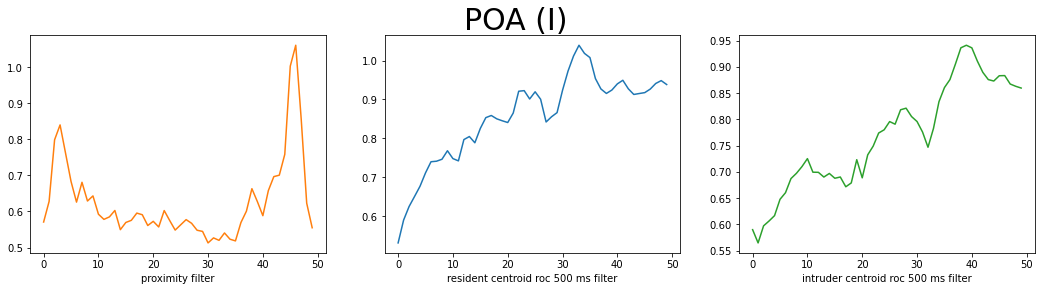

AH (E)
proximity 0.35
resident centroid roc 500 ms 0.37
intruder centroid roc 500 ms 0.37


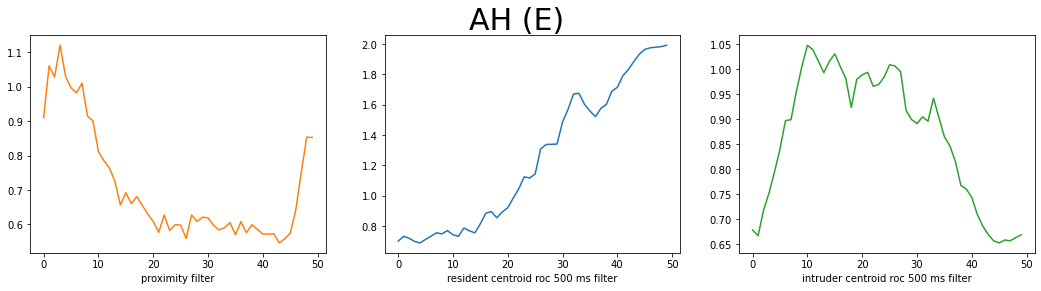

AH (I)
proximity 0.26
resident centroid roc 500 ms 0.26
intruder centroid roc 500 ms 0.26


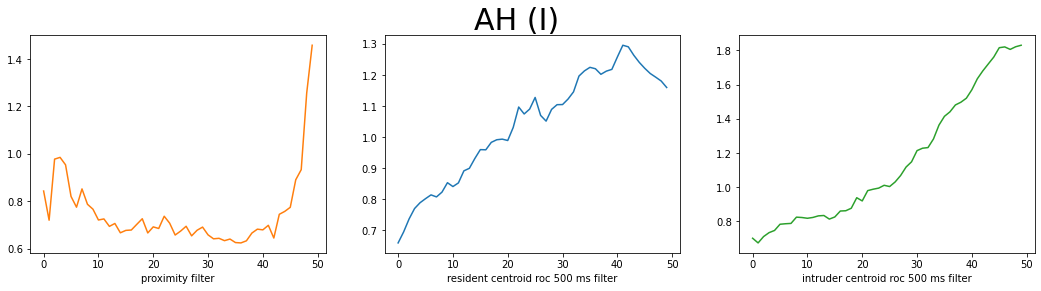

MeA (E)
proximity 3.38
resident centroid roc 500 ms 3.82
intruder centroid roc 500 ms 3.85


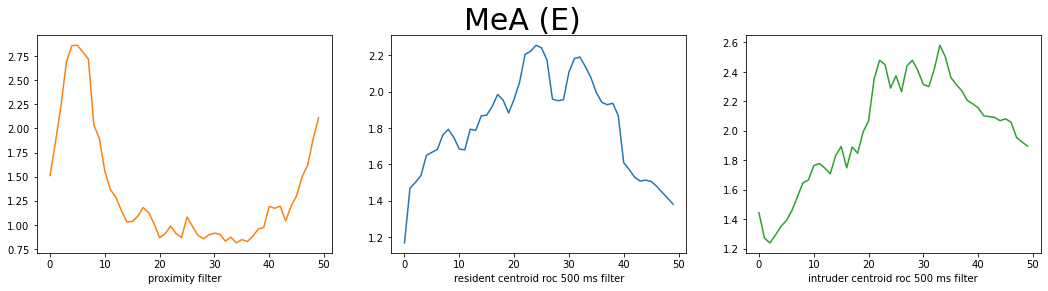

MeA (I)
proximity 0.53
resident centroid roc 500 ms 0.54
intruder centroid roc 500 ms 0.57


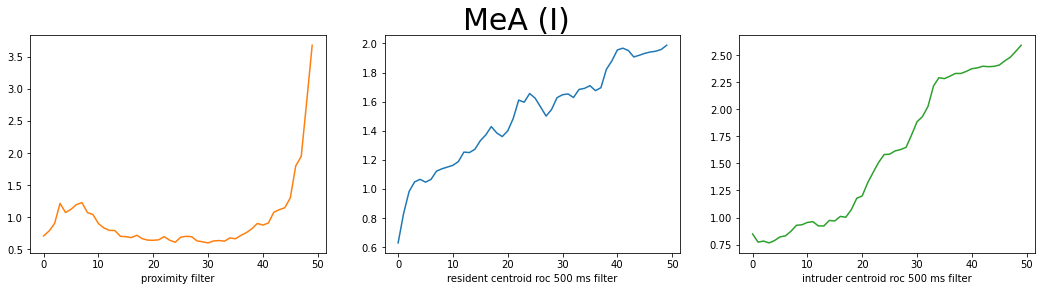

VMH (E)
proximity 0.81
resident centroid roc 500 ms 0.87
intruder centroid roc 500 ms 0.86


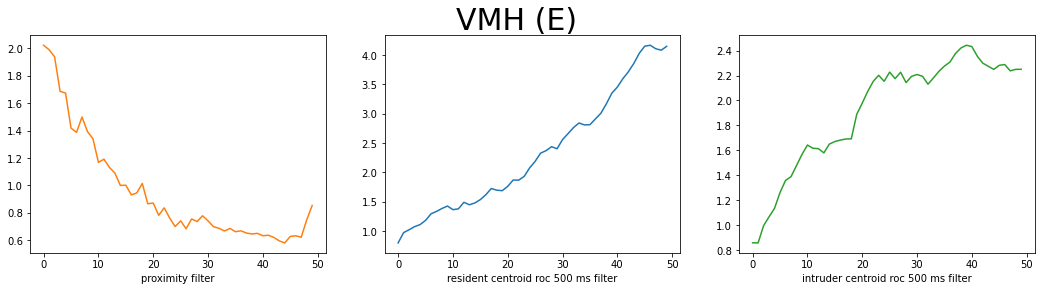

VMH (I)
proximity 0.43
resident centroid roc 500 ms 0.45
intruder centroid roc 500 ms 0.45


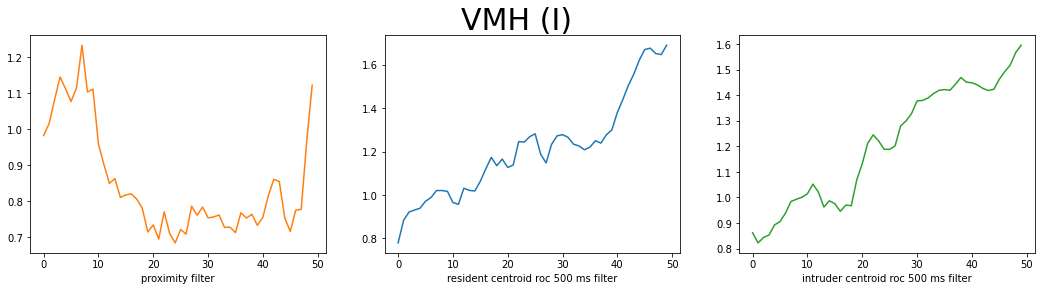

PAG (E)
proximity 0.27
resident centroid roc 500 ms 0.21
intruder centroid roc 500 ms 0.26


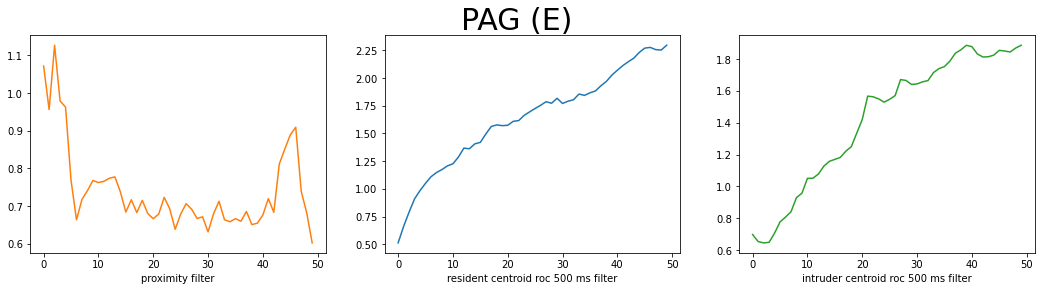

PMv (E)
proximity 2.04
resident centroid roc 500 ms 2.24
intruder centroid roc 500 ms 2.23


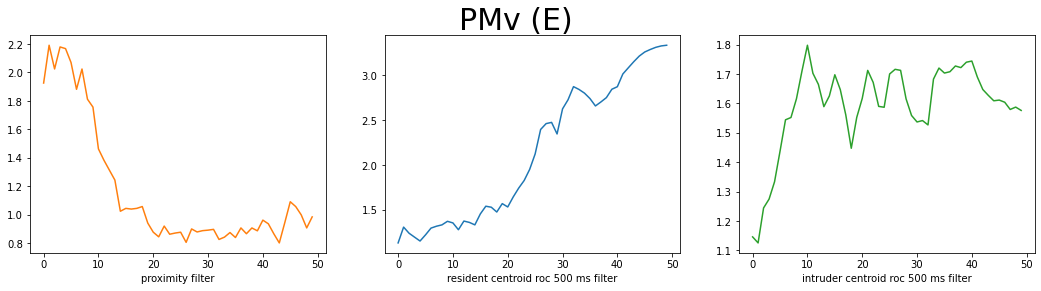

PMv (I)
proximity 1.28
resident centroid roc 500 ms 1.74
intruder centroid roc 500 ms 1.75


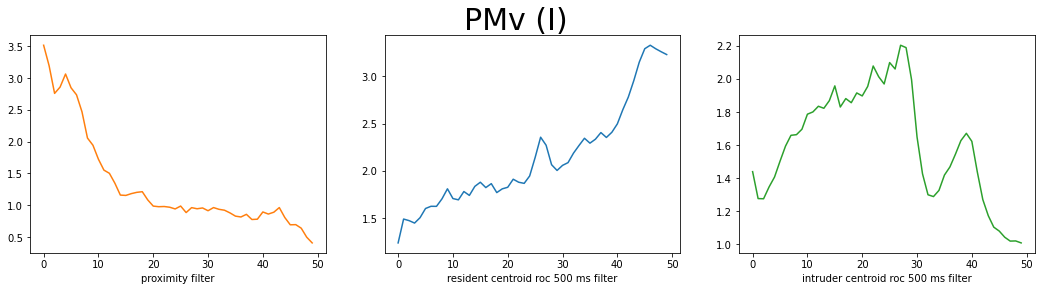

LHb (E)
proximity 0.3
resident centroid roc 500 ms 0.28
intruder centroid roc 500 ms 0.31


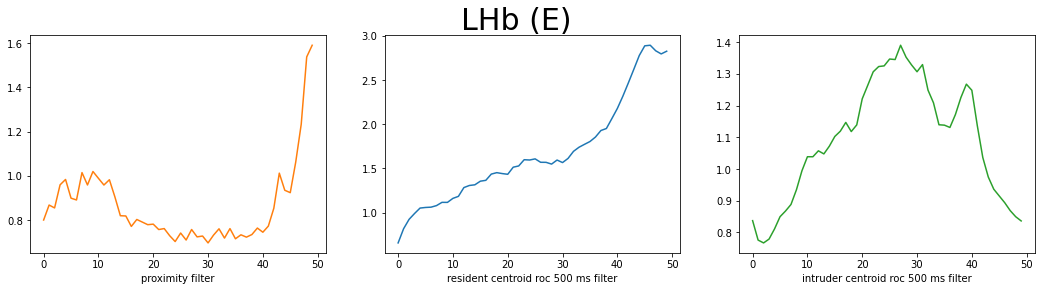

LHb (I)
proximity 0.67
resident centroid roc 500 ms 0.8
intruder centroid roc 500 ms 0.81


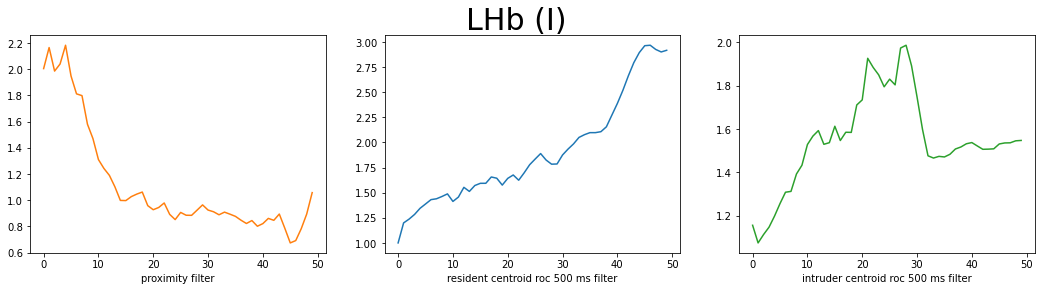

PA (E)
proximity 1.29
resident centroid roc 500 ms 1.47
intruder centroid roc 500 ms 1.48


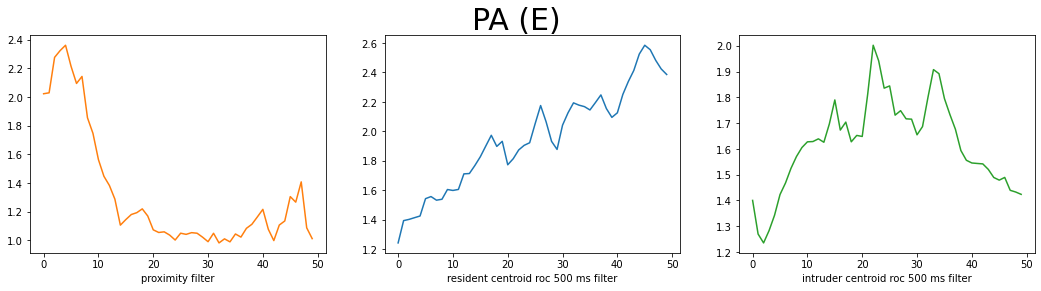

PA (I)
proximity 0.79
resident centroid roc 500 ms 0.88
intruder centroid roc 500 ms 0.91


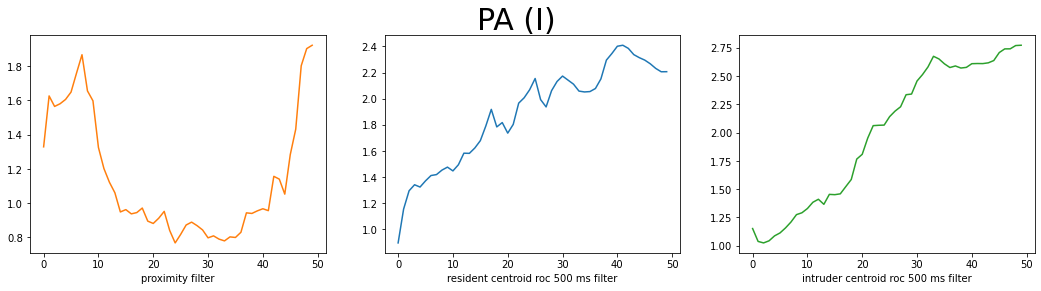

NAc (DA)
proximity 0.47
resident centroid roc 500 ms 0.48
intruder centroid roc 500 ms 0.48


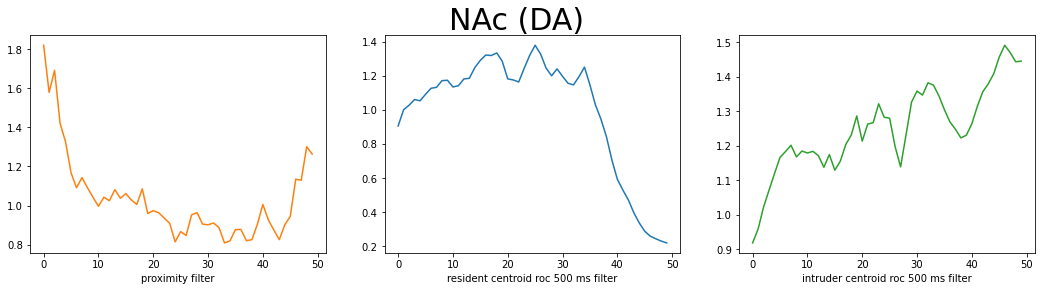

In [ ]:
from sklearn.model_selection import train_test_split
W_map = np.empty((len(regions)), dtype=object)
train_mse = np.zeros((len(regions)))
test_mse = np.zeros((len(regions)))
Nbins = 50

colorsList = ['tab:orange','tab:blue','tab:green']
for reg in range(len(regions)):
    fig, axes = plt.subplots(nrows=1,ncols=3, figsize=(18,4))
    print(regions[reg])
    for ind in range(0,3):
        X_all, X = get_design_X_GLM_features(animal, features=[featuresShortlist[ind]], Nbins=Nbins, path=None)
        Y_all, Y = get_output_Y_GLM(animal, regions[reg], path=None)
        D = X_all.shape[1]

        # Split data
        # X_train, X_test, Y_train, Y_test = train_test_split(X_all, Y_all, test_size=0.2, random_state=42)
                
        # Fit to train data
        W_map[reg] = solution_linear_Gaussian_smoothing(X_all, Y_all, lamda=100)

        # MSE
        train_mse[reg] = lsr_mse(X_all, Y_all, W_map[reg])
        # test_mse[reg] = lsr_mse(X_all, Y_all, W_map[reg])
        
        print(str(featuresShortlist[ind]) + ' ' + str(np.round(train_mse[reg],2)))
        axes[ind].plot(W_map[reg], color=colorsList[ind])
        axes[ind].set_xlabel(featuresShortlist[ind] + ' filter')
    fig.suptitle(str(regions[reg]), size=20)
    plt.show()


0.29966730793953616


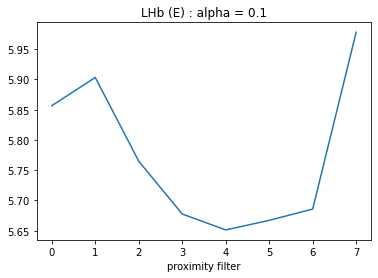

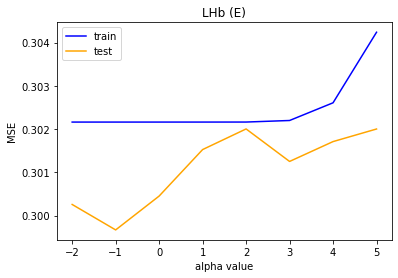

0.3001689252769466


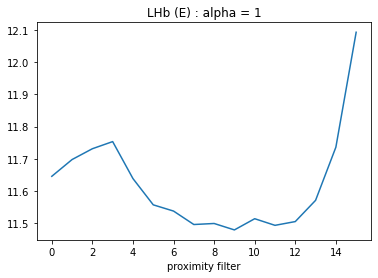

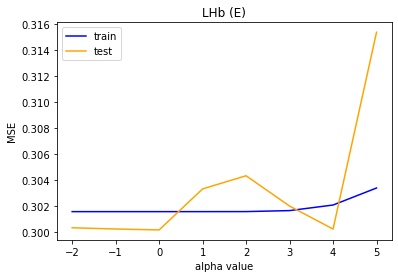

0.29974437016216954


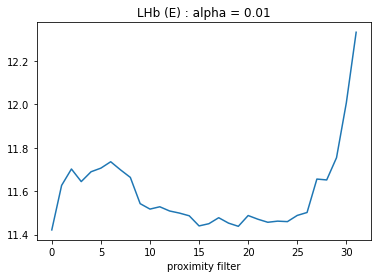

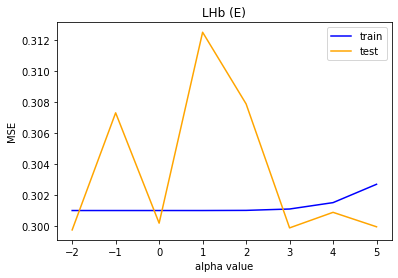

0.2993483601826465


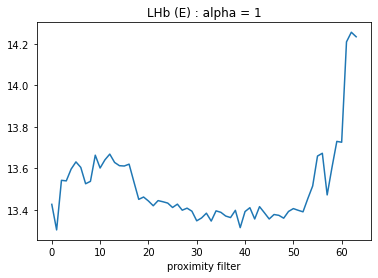

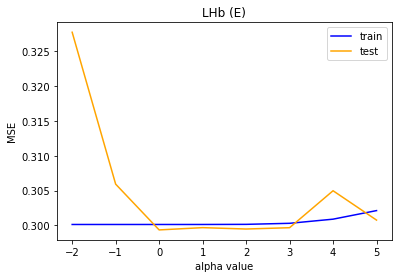

0.2988669146764981


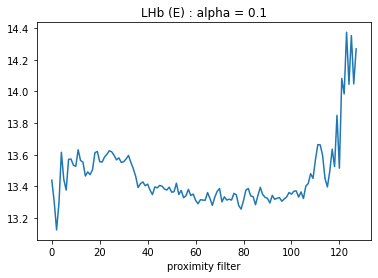

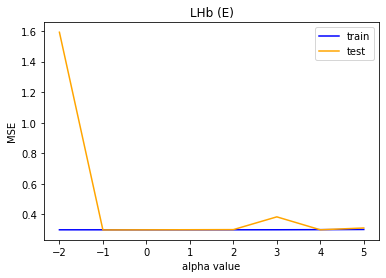

0.29768897684771967


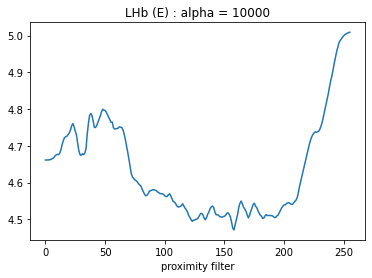

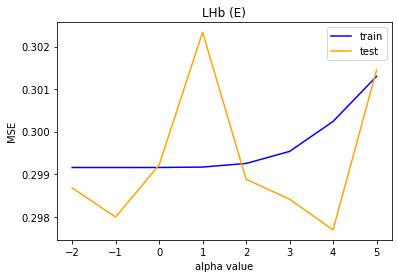

In [16]:
alpha_values = [10**x for x in range(-2,6)] # [0.1,0.3,1,3,10,30,100,300,1000,3000,10000]
Nbin_values = [2**x for x in range(3,9)] #[4, 8, 16, 32, 64, 128, 256]

W_map, train_mse, test_mse = fit_CV_linear_Gaussian_smoothing(animal='29L', features=[featuresShortlist[0]], region='LHb (E)', Nbin_values=Nbin_values, alpha_values=alpha_values)          
            
        

In [ ]:
fig, axes = plt.subplots()
        axes.plot(W_map[Nbin_ind, best_alpha][1:])
        axes.set_xlabel(features[0] + ' filter')
        axes.set_title(region + ' : alpha = ' + str(alpha_values[best_alpha]))
        plt.show()

        fig, axes = plt.subplots()
        axes.plot(np.log10(alpha_values), train_mse[Nbin_ind, :], color='blue', label='train')
        axes.plot(np.log10(alpha_values), test_mse[Nbin_ind, :], color='orange', label='test')
        axes.set_ylabel('MSE')
        axes.set_xlabel('alpha value')
        axes.set_title(region)
        axes.legend()
        plt.show()

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X_all, Y_all, test_size=0.2, random_state=42)
solution_linear_Gaussian_smoothing(X_train, Y_train, feature_start=[0, 1, X_all.shape[1]], alpha=1000) # bias term and only one tuning curve


array([ 10.93774076,  -9.22974845,  -9.52421046,  -9.8112942 ,
        -9.98373164, -10.15156689, -10.19886265, -10.2429145 ,
       -10.28327853, -10.30917184, -10.29604167])

In [ ]:
w_MLE = solution_GLM_linear_Gaussian(X_all, Y_all, lamda=0.1)
N = 80
h = np.histogram(X_all @ w_MLE, bins=N)
y_avg = np.zeros((N))
for bin in range(0,N):
  ind_higher = np.argwhere(X_all @ w_MLE >= h[1][bin]).flatten()
  ind_lower = np.argwhere(X_all @ w_MLE < h[1][bin+1]).flatten()
  ind_bin = list(set(ind_lower).intersection(set(ind_higher)))
  y_avg[bin] = Y_all[ind_bin].sum()/len(ind_bin)
plt.scatter(X_all @ w_MLE, np.exp(X_all @ w_MLE), label='exp(x)')
plt.scatter(X_all @ w_MLE, np.log(1+np.exp(X_all @ w_MLE)), label='log(1+exp(x))')
plt.scatter(h[1][:-1], y_avg, color='red', label='avg spike count')
plt.xlabel('Xw')
plt.ylabel('f(Xw)')
plt.legend()
plt.show()

In [18]:
from sklearn.model_selection import train_test_split
lamda_values = [0.1,1,10,100,1000] #,3000,10000,30000]
lag_values = [[-1,1],[-3,3],[-10,10],[-30,30],[-100,100],[-300,300],[-1000,1000]] #,[-3000,3000]]
W_map = np.empty((len(lamda_values), len(lag_values)), dtype=object)
train_mse = np.zeros((len(lamda_values), len(lag_values)))
test_mse = np.zeros((len(lamda_values), len(lag_values)))

for ind1 in range(len(lamda_values)):
    lamda = lamda_values[ind1]
    for ind2 in range(len(lag_values)):
        [lag_minus, lag_plus] = lag_values[ind2]
        variables={'aggr' : [lag_minus, lag_plus]}
        X_all, X = get_design_X_GLM(animal, variables=variables, path=None)
        Y_all, Y = get_output_Y_GLM(animal, 'VMH (E)', path=None)
        D = X_all.shape[1]
            
        # Split data
        X_train, X_test, Y_train, Y_test = train_test_split(X_all, Y_all, test_size=0.2, random_state=42)
            
        # Fit to train data
        W_map[ind1, ind2] = solution_linear_Gaussian_smoothing(X_train, Y_train, featureIndex=[0, 1, X_all.shape[1]], alpha=alpha)

        # MSE
        train_mse[ind1,ind2] = lsr_mse(X_train, Y_train, W_map[ind1,ind2])
        test_mse[ind1,ind2] = lsr_mse(X_test, Y_test, W_map[ind1,ind2])

            # plt.scatter(-lag_minus-1, W_map[ind1, ind2][0])
            # plt.xticks([-lag_minus-1] + list(range(-lag_minus, lag_plus,5)), ['bias'] + list(range(-lag_minus, lag_plus, 5)))
            # plt.plot(range(-lag_minus, lag_plus), W_map[ind1, ind2][1:])
            # plt.ylim(-0.5,2.5)
            # plt.xlabel('aggression filter')
            # plt.title(f'lambda = {lamda}, ' + f'lag is ({lag_minus},{lag_plus})')
            # plt.show()

### Soft-plus Gaussian GLM

[0.62245273 0.78907392]


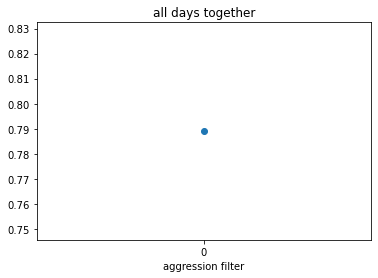

In [79]:
# Linear Gaussian GLM model 
def neglog_GLM_soft_plus_Gaussian(w, sigma, X, Y):
    f_X = np.log(1+np.exp(X @ w))
    negLl = X.shape[0]/2 * np.log(2*np.pi*sigma**2) + 1/(2*sigma**2) * np.linalg.norm(f_X-Y) ** 2
    return negLl
w_hat = scipy.optimize.minimize(neglog_GLM_soft_plus_Gaussian, w_MLE, args=(1, X_all, Y_all))['x']
print(w_hat)
plt.scatter(range(lag_minus + lag_plus ), w_hat[1:])
plt.xticks(range(lag_minus + lag_plus),range(-lag_minus,lag_plus))
plt.xlabel('aggression filter')
plt.title('all days together')
plt.show()